#### ORIE 4580/5580: Simulation
#### Fall 2020
#### Course Project

Team NetIDs: cjl276, cjv47, gsp65, njc76, fw235, pjg222

### I. Executive Summary

The following research will detail modeling and experimentation around different vaccination strategies in order to not only control major disease outbreaks but also to strategize in order to protect the most vulnerable populations. The model is flexible and can easily incorporate new data, giving experimentalists the opportunity to test different scenarios. 

The model simulates a population by first dividing it into four classes: medical workers, essential non-medical workers, non-essential high risk people, and non-essential low risk people. Every agent across the four classes falls into one of three groups: infected, recovered, or susceptible. Within the infected category, a percentage of the agents are symptomatic, whereas the remaining are asymptomatic. 

This model is based on the following assumptions: 1. Infected and recovered agents shall not be vaccinated; 2. Infection creates functional antibodies; 3. Population includes 16.1 million medical workers, 31.7 million essential non-medical workers, 16.4 million non-essential high risk people, 250 million non-essential low risk people; and 4. Probabilities that an agent becomes symptomatic is 80% for medical workers, 65% for essential non-medical workers, 65% for non-essential high risk people, and 60% for non-essential low risk people.

Our research was mostly an iterative process of holding one of the two major vaccination strategies parameters – vaccination rate & the vaccination batch size – constant and ticking the other. We started with a vaccination batch size of 50 and tested vaccination rates from 100 to 10,000 in increments of 100, with the major objective of minimizing cases among the non-essential high risk people class, consequently minimizing the number of deaths.

Final modeling results suggest that the optimal vaccination rate and vaccination batch size are 4,400 and 1, respectively. This illustrates that optimal vaccination strategies should have a high number of events of one vaccination at a time. This minimizes contact, vaccinates the population effectively, and, with correct orientation and compliance from government and the public, best controls the spread of infectious viruses.

### II. Modeling Approach, Assumptions, Parameters

The approach to building the following model relies on several parameters and assumptions. First, the agents in the model are separated into four classes: medical workers, essential non-medical workers, non-essential high risk people, and non-essential low risk people. The population of each class can be varied in the model to reflect various population compositions. Next, each agent across the four classes falls into one of 3 groups: infected, recovered, or susceptible. Within the agents that have been infected, a fraction of them are symptomatic while the remainder are asymptomatic. There are two initial assumptions that are made based on these categories: 1. only susceptible nodes may be vaccinated, and 2. once a node has recovered it cannot be re-infected.

The speed at which the virus runs its course is dependent on several rate parameters. The first is the meet rate, which is the rate at which agents come into contact with each other. This rate is dependent on the number of people each individual meets per day, as well as the total number of individuals in the population. Next, we have the recovery rate, the rate at which infected people return to good health. This rate also depends on the number of people that each individual comes into contact with on a given day, as well as a basic reproduction constant R0, which is defined to be the expected number of cases directly generated by one infected individual in a population where all other individuals are susceptible. Lastly, we have the vaccination rate which reflects the frequency at which agents in the susceptible population are vaccinated.

The behavior of the model in terms of the spread of the epidemic across population groups is highly dependent on the sizes of the classes defined, as well as the magnitude of the rates defined. Therefore, altering these parameters will result in dramatically different results. Regardless of the parameters chosen, however, the model rests upon several assumptions that remain consistent amongst vaccination policies. First, the value for R0 for COVID-19 has been calculated as being somewhere between 1.4 and 5 according to our research. As the upper range differs depending on the source, for the purposes of this model we are choosing an R0 of 2. Next, the proportion of the total population belonging to each class defined above is set based upon several demographic articles. According to CEPR, there are 16.1 million healthcare workers (C1) and 31.7 million frontline workers (C2). According to PubMed, 5% of the total population can be labeled as high risk, which evaluates to 16.4 million (C3). This leaves the remainder of the population at 250 million (C4). Additionally, we made overall assumptions for the probability that an agent becomes symptomatic when infected based on our research. We determined these rates to be 80% for medical workers (C1), 65% for essential non-medical workers (C2), 65% for non-essential high risk people (C3) and 60% for non-essential low risk people (C4).

A deeper analysis and explanation of the aforementioned rates and parameters will be further discussed in the following sections of this report, but it is important to note that small changes in such parameters and assumptions can reveal significant differences in the behavior of the model and spread of the virus.



### III. Model Details

This model is an absorbing markov chain, where all entities all end up at state “R” – the state when an entity recovers after becoming infected (for the purposes of simplicity, we send entities that are vaccinated to state “R” as well but mark them accordingly so that we know they were vaccinated). The visual below represents this track of events for an entity of a given class. The nodes are labeled with Ci beacuse each class has a seperate markov chain, but all absorb into the same absorbing state (Recovered or Vaccinated). Notice that the rates are dependent on which class the entity is. Furthermore, the vaccination rate is dependent on “n,” the number of people that can be vaccinated.

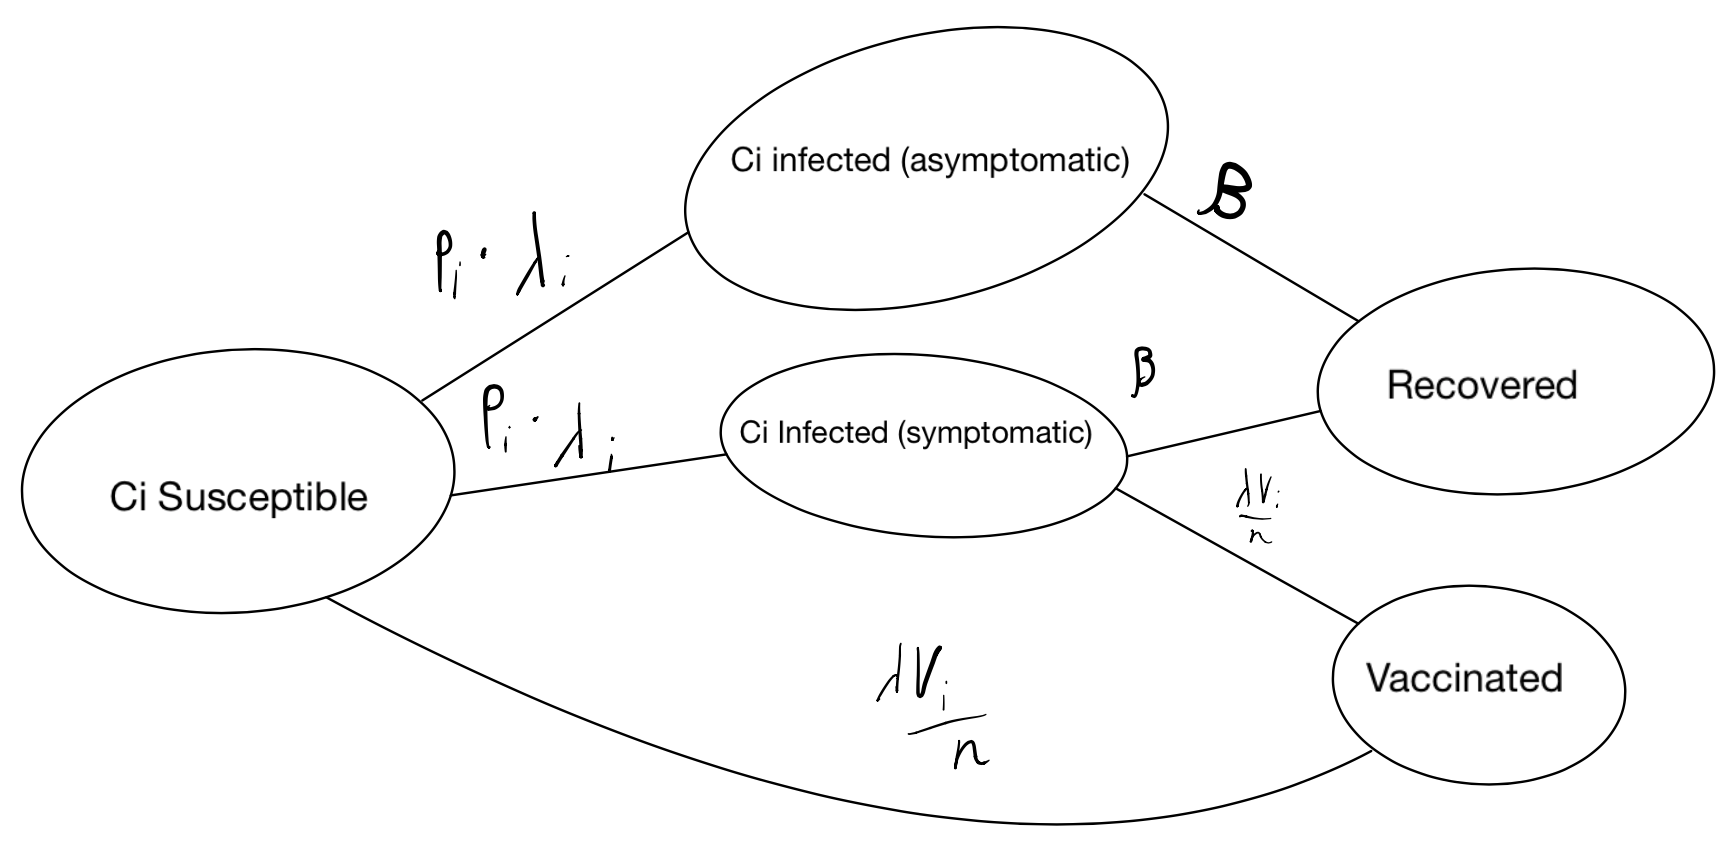

 In order to build the model described above, we decided to utilize the python class structure in order to store information on the simulation in an organized fashion. Class “State” contains several class variables to keep track of entities that are infected, susceptible, available for vaccination, and recovered (across all classes). Furthermore, we keep track of entities that are infected AND symptomatic and remove them from their class lists because these would be the entities in the hospital. Secondly, we use class “Agent” so that every entity is a unique python object, with class variables  state and class in string representation. The class string proves to be extremely useful for the structure of the model as it is used frequently as an identifying key for dictionary objects. 

Furthermore, we created two helper functions to help with the organization of the simulator: infect_entity and calculate_rate. Infect_entity is called when there is an event of a susceptible entity meeting an infected entity. It takes on two positional arguments which are the object of class State for the simulation and the string representing the class of the infected entity. Based on the input of the class type, the probability of becoming symptomatic is retrieved and used to condition against a uniform random variable. Based on the outcome of the conditional statement, relevant updates are made that remove the entity from the susceptible list and place them in the according infected list (symptomatic or asymptomatic). Next, the calculate_rate function is used to update the rate of infection of this particular class; it takes two positional arguments, the object of class State and the string representing the said class. The relevant rates are retrieved from the rate matrix (for example, if we wanted to know the rate Class 1 meets Class 3, we query lambda[0][2]). The total rate is then calculated by multiplying these rates by their corresponding number of pairs. For example, the number of ways an entity of Class 1 can be infected by Class 3 is the amount of susceptible entities of Class 1 times the number of infected asymptomatic entities of Class 3. These rates need to be done after every event because the rate will change based on the number of infected in each class and the number of susceptible in the input class. 

Once we have our helper functions defined, the simulator model is a bit easier to break down. The simulator, SIR_cluster_simulator, takes 9 positional inputs which are all defined in the documentation of the model. These inputs are the parameters of the model we will tune to our assumptions and manipulate to study different vaccination scenarios. We first initialize the state of the simulation by creating an object of class State with the input specifications. Next, based on the input number of people in each class, we initialize all the entities in our population and place them in their corresponding class in the susceptible state dictionary. Next, we enter a while loop at time zero, which will break when the event time exceeds the input time period, or the virus is eradicated. We then retrieve/calculate 6 rates for 6 different event cases. For states 1-4, an entity becomes infected from C1, then C2, then C3, then C4. For state 5, an infected entity recovers. For state 6, an entity qualifying for vaccination is vaccinated. 

With these rates retrieved, we add them together to calculate the total arrival rate for events. We generate a random exponential variable with this rate, and a random uniform random variable to determine the event time occurs next. If an entity is infected, we simply utilize the helper function by calling it and inputting the corresponding class key. If the event is a recovery, the model will select a single entity from the list of all infected entities (symptomatic and asymptomatic) and update that entity state while making the correct list adjustments. Finally, if the event is a vaccination, the model will select a group (of the input batch size) of random entities that are valid for the vaccination and make the correct updates to these entities. At the end of the while loop, we record data such as the time step and the amount infected in each class. As soon as the loop is finished the simulator returns the state object, which will contain all relevant information for analysis of that said simulation.

We were able to validate this model by running it on edge cases and general scenarios. For example, first, we checked if the simulator was working correctly with an epidemic spread in general. We simplified the model by setting all groups to have an equal number of people and probabilities of being symptomatic to 0 across all classes. We also did not simulate using vaccines in these runs. The results were consistent with our predictions, showing a sharp increase in cases initially and then a slow decline. These values also changed as we would expect when we adjusted the rate of entities meeting. Furthermore, we tested the vaccination by first setting an arbitrarily high number, which completely prevented the outbreak. We then brought the vaccination numbers down to significant inputs and the changing amount of people infected which had an inverse relationship as expected. With these validations, we were ready to move on to model analysis.


### IV. Model Analysis

Different vaccination strategies have profound effects on the quantity and profile of individuals who become infected. The vaccination strategy is determined by two key parameters: (1) v, the vaccination rate, and (2) $n_v$, the vaccination batch size. These two parameters have to be chosen in sync as they affect one another as well as the overall strategy. For example, a high rate with large batch size leads to a vaccination system overload, causing a lower throughput in the system. The results from different combinations of input parameters indicates that high vaccination rates work better for more conservative batch sizes. 

In order to determine the optimal vaccination strategy we performed an iterative process of holding a parameter constant while exploring changes in the other input. First, we set the vaccination batch size (nv) at 50 and tested vaccination rates ( v) from 100 until 10,000 in increments of 100. 

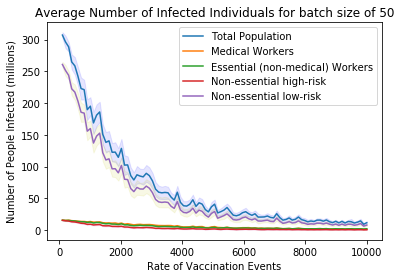

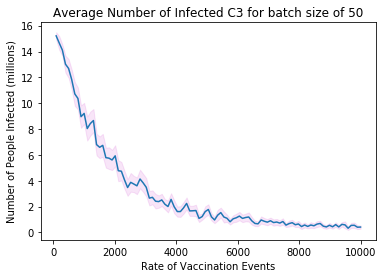

Note that a major objective is to minimize the group C3 cases, as this would suggest that less high-risk individuals are infected and, as a result, decrease the total number of deaths. The average number of infected individuals graphs suggest that the infections leveled out at a rate around 5700 vaccination events. At this level group C3 cases were also relatively low at around 1 million infections.

Next, we set the rate at this local optimal level of 5700 vaccination events and tested different batch sizes. In this case from a batch size of 1 until 1000 in increments of 10. 


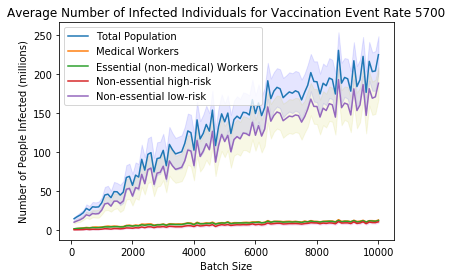

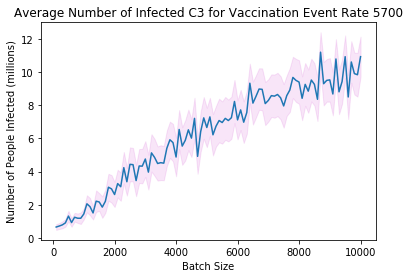

The results suggest that the optimal batch size is one vaccination as in this scenario the average number of infected individuals is minimized. Now, continuing in the iterative process we set the batch size to 1, and tested different vaccination rates once again from 100 until 10,000 in increments of 100. 

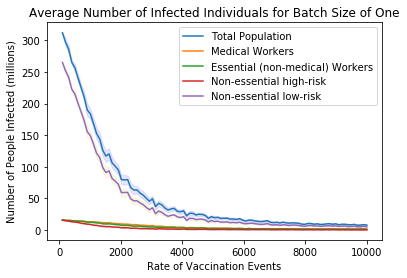

Our model suggests that the optimal vaccination rate is 4400 and batch size is 1, i.e. v=4400 and $n_v=1$. These results imply that the vaccination strategy should have multiple events of only one vaccination. This scenario would allow vaccinations to be effectively carried out while avoiding bottlenecks in the system, minimizing the total number of infected individuals.


### V. Conclusion and Recommendation

After running many tests, we have concluded that the optimal vaccination rate for our test population is 4,400, with a batch size of 1. These results imply that the vaccination strategy should have a high number of events containing only one vaccination. This would allow vaccinations to be effectively carried out while avoiding bottlenecks in the system, and thus minimize the total number of infected individuals. We also found that we need 80% of the population vaccinated or recovered in order to achieve herd immunity. In a real life scenario, this means creating a system in which individuals would sign up for specific time slots in order to be vaccinated individually, as opposed to having walk-in clinics where there is potential for large groups of people to be waiting in lines. This system would have to be incredibly efficient in order to administer the vaccination to a high number of people without any delays and therefore is fairly unrealistic. Chances are, people will be late or there will be some vaccinations that take longer due to registration challenges, etc. That being said, attempting to create some kind of schedule rather than having random walk-ins should be the ultimate goal.

Currently, medical workers are having to sign up for time slots in order to get their vaccination through their respective places of employment. This is a special case, as their place of work is the place of vaccination, and they are already registered through their position as a medical care provider. Once the vaccine becomes available to the more general public, it will be a much larger challenge to organize the schedule of individuals receiving the vaccination. Places like college campuses, such as Cornell, will likely have an easier time controlling this, as they can have students and staff sign up for specific time slots and vaccinate them on campus. In terms of the widespread population, we still recommend that there be very few walk-in appointments available in order to create the least amount of bottlenecks. We understand that this may not be realistic in some cases, but we should try to get as close as possible.

### VI. Technical Appendix

In [ ]:
#Import all necessary functions
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(6)

#Animation
from IPython import display
import time

#### Classes:

1. **State**: Initializes all possible states and classes

2. **Agent**: Initializes a single agent

In [ ]:
class State:
    def __init__(self, λ, λ_s, β, n, p, λ_v, n_v):
        #list of agents in classes C1, C2, C3, C4 respectively
        #medical workers
        self.medical_class = []
        #essential non-medical workers
        self.essential_nm = []
        #non-essential high-risk
        self.high_risk_ne = []
        #non-essential low-risk
        self.low_risk_ne = []
        #dictionary with each item containing a list of susceptible entities across classes
        self.S = {'C1': [], 'C2': [], 'C3': [], 'C4': []}
        #dictionary with each item containing a list of infected entities across classes
        self.I = {'C1': [], 'C2':[], 'C3': [], 'C4': []}
        #dictionary with each item containing a list of entities available for vaccination
        self.V = {'C1': [], 'C2': [], 'C3': [], 'C4': []}
        
        #Infected symptomatic across all classes
        self.I_sym = []
        #recovered across all classes
        self.R = []
        #Total agents infected
        self.infected = []
        #Total agents available for Vaccination
        self.V_tot = []
        #times when vaccination ovccurs
        self.vac_time = []
        
        #dict of probabilities an infected agent is symptomatic
        #{'C1': 0, 'C2': 0, 'C3', 0, 'C4': 0}
        self.p = p
        #dict of the size of each class
        #{'C1': 0, 'C2': 0, 'C3', 0, 'C4': 0}
        self.n = n
        #meet rate matrix
        self.λ = λ
        #sympotic meet rate with medical works
        self.λ_s = λ_s
        #recovery rate
        self.β = β
        #vaccination rate
        self.λ_v = λ_v
        #number of people in a group vaccinated for each arrival
        self.n_v = n_v
        
        #lists for recording data at events
        self.times = []
        self.num_inf = []
        self.C1_inf = []
        self.C2_inf = []
        self.C3_inf = []
        self.C4_inf = []
        self.int_time = []    

In [ ]:
class Agent:
    def __init__(self, c):
        """
        Arg(s): 
            c: string representation of this class type
        """
        #string representation of the state of the person ('S', 'I_a', 'I_s', 'R') 
        self.state = 'S'
        self.C = c

#### Helper Functions:

1. **infect_entity**: Executes the process for infecting a given class.

2. **calculate_rate**: Calculates the rate of infection accross a class

In [ ]:
def infect_entity(sim_state, key):
    """
    Helper function for the simulator that executes the process for 
    infecting a given class. NO return value, class variables are updated
    
    Arg(s):
        sim_state: An instance of class State
        key: String representation of the entitie's class
    """
    i = np.random.randint(0, len(sim_state.S[key]))
    ent = sim_state.S[key].pop(i)
    sim_state.infected.append(ent)
    #urv for if the patient shows symptoms or not
    prob = np.random.uniform()
    #patient is symptomatic
    if prob < sim_state.p[key]:
        ent.state = 'I_s'
        sim_state.I_sym.append(ent)
        sim_state.V[key].remove(ent)
        sim_state.V_tot.remove(ent)
    #patient is assymptomatic
    else:
        ent.state = 'I_a'
        sim_state.I[key].append(ent)

In [ ]:
def calculate_rate(sim_state, key):
    """
    Calculates the rate of infection across a given class
    Arg(s):
        sim_state: an instance of class State
        key: String representation of the entitie's class
    Returns:
        Rates for C1, C2, C3, C4, β_tot (respectively)
    """
    ###Ways for C1 to get infected
    #number of (key,1) pairs
    n_pair_1 = len(sim_state.S[key]) * len(sim_state.I['C1'])
    #number of (key,2) pairs
    n_pair_2 = len(sim_state.S[key]) * len(sim_state.I['C2'])
    #number of (key,3) pairs
    n_pair_3 = len(sim_state.S[key]) * len(sim_state.I['C3'])
    #number of (key,4) pairs
    n_pair_4 = len(sim_state.S[key]) * len(sim_state.I['C4'])
    #number of pairs with C1 and symptomatic people
    n_pair_1a = len(sim_state.S['C1']) * len(sim_state.I_sym)

    #populating the rates according to the number of pairs of people
    n = int(key[1]) - 1
    #infection rate on key from class 1
    λ_1 = λ[n][0]
    #infection rate on key from class 2
    λ_2 = λ[n][1]
    #infection rate on key from class 3
    λ_3 = λ[n][2]
    #infection rate on key from class 4
    λ_4 = λ[n][3]
    λ_1a = λ_s 
    
    #rate that the class key is infected
    λ_key = λ_1 * n_pair_1 + λ_2 * n_pair_2 + λ_3 * n_pair_3 + λ_4 * n_pair_4 + (λ_1a * n_pair_1a * (key == 'C1'))

    return λ_key

#### Model:

In [ ]:
def SIR_cluster_simulator(T,infect, λ, λ_s, β, n, p, λ_v, n_v):
    """
    Simulate an epidemic clustered by class
    
    Arg(s):
        Suggestion: 
        Priority_queue: ordered list of class types by vaccnination priortiy (if possible, the proportion of people in each class that need to be vaccinated)
        i.e. {"C1": 80% need to vaccinate before moving on, "C2": 50% need to vaccinate before moving on, etc.}
        poisson or not --> if yes, use SIR in 1 --> if no, use SIR_Onego (1part_e)
        
        T: Amount of time to simulate over
        infect: String input that is the class of the infected entity 
        λ: meet rate 2x2 matrix 
        λ_s: meet rate for symptomatic and C1
        beta: recovery rate
        n: dict of the size of each class
        p: dict of probabilities an infected agent is symptomatic
        λ_v: rate of vaccination arrivals
        n_v: the number of people in a group that are vaccinated (default is 1)
        
    """
    #initializing the state of the system based on the inputs
    sim_state = State(λ, λ_s, β, n, p, λ_v, n_v)
    
    for key, value in n.items():
        for i in range(n[key]):
            agent = Agent(key)
            sim_state.S[key].append(agent)
            sim_state.V[key].append(agent)
            sim_state.V_tot.append(agent)
            if key == 'C1':
                sim_state.medical_class.append(agent)
            elif key == 'C2':
                sim_state.essential_nm.append(agent)
            elif key == 'C3':
                sim_state.high_risk_ne.append(agent)
            else:
                sim_state.low_risk_ne.append(agent)
    
    #infecting a single person of classs 'infect'
    ent = sim_state.S[infect].pop(0)
    ent.state = 'I_a'
    sim_state.I[infect].append(ent)
    sim_state.infected.append(ent)

    count = 0
    while count < T:
        #retrieving rate values across classes
        λ_C1 = calculate_rate(sim_state, 'C1')
        λ_C2 = calculate_rate(sim_state, 'C2')
        λ_C3 = calculate_rate(sim_state, 'C3')
        λ_C4 = calculate_rate(sim_state, 'C4')
        #total recovery rate
        β_tot = β * (len(sim_state.I['C1']) + len(sim_state.I_sym) + len(sim_state.I['C2']) + \
                                         len(sim_state.I['C3']) + len(sim_state.I['C4']))
        #total vaccination rate
        if len(sim_state.V_tot) > 0:
            λv_tot = (λ_v/ n_v)
        else:
            λv_tot = 0
        
        λ_tot = λ_C1 + λ_C2 + λ_C3 + λ_C4 + β_tot + λv_tot
        
        #case if virus is erradicated
        if λ_tot == 0:
            break

        λ_rand = np.random.exponential(1/λ_tot)
        count += λ_rand
        U = np.random.uniform()
        
        ###CASE 1: A susceptible person from C1 is infected
        if U < λ_C1 / λ_tot:
            infect_entity(sim_state, 'C1')
            
        ###CASE 2: A susceptible person from C2 is infected
        elif U < (λ_C1 + λ_C2) / λ_tot:
            infect_entity(sim_state, 'C2')
        
        ###CASE 3: A susceptible person from C3 is infected
        elif U < (λ_C1 + λ_C2 +λ_C3) / λ_tot:
            infect_entity(sim_state, 'C3')

        ###CASE 4: A susceptible person from C4 is infected
        elif U < (λ_C1 + λ_C2 +λ_C3+ λ_C4) / λ_tot:
            infect_entity(sim_state, 'C4')
            
        ###Case 5: An entity (or batch) is vaccinated
        elif U < (λ_C1 + λ_C2 + λ_C3 + λ_C4 + λv_tot) / λ_tot:
            #all people available for vaccination
            sim_state.vac_time.append(len(sim_state.times))
            n = min(n_v, len(sim_state.V_tot))
            for i in range(n):
                i = np.random.randint(0, len(sim_state.V_tot))
                ent = sim_state.V_tot.pop(i)
                sim_state.V[ent.C].remove(ent)
                if ent in sim_state.S[ent.C]:
                    sim_state.S[ent.C].remove(ent)
                    ent.state = 'R_v'
                else:
                    sim_state.I[ent.C].remove(ent)
                    sim_state.infected.remove(ent)
                    ent.state = 'R'
                sim_state.R.append(ent)
                     
        ###Case 6: A person recovers
        else:
            i = np.random.randint(0, len(sim_state.infected))
            ent = sim_state.infected.pop(i)
            sim_state.R.append(ent)
            #if the recovered person is from assymptomatic
            if ent.state == 'I_a':
                sim_state.I[ent.C].remove(ent)
                sim_state.V[ent.C].remove(ent)
                sim_state.V_tot.remove(ent)
            #if the recovered person is symptomatic
            else:
                sim_state.I_sym.remove(ent)
            ent.state = 'R'

        #recording data
        sim_state.times.append(count)
        sim_state.num_inf.append(len(sim_state.infected))
        #counting infected across classes
        C1 = sim_state.n['C1'] - (len(sim_state.S['C1']))
        C2 = sim_state.n['C2'] - (len(sim_state.S['C2']))
        C3 = sim_state.n['C3'] - (len(sim_state.S['C3']))
        C4 = sim_state.n['C4'] - (len(sim_state.S['C4']))
        
        for ent in sim_state.R:
            if ent.C == 'C1':
                C1 -= 1
            elif ent.C == 'C2':
                C2 -= 1
            elif ent.C == 'C3':
                C3 -= 1
            else:
                C4 -= 1
        
        sim_state.C1_inf.append(C1)
        sim_state.C2_inf.append(C2)
        sim_state.C3_inf.append(C3)
        sim_state.C4_inf.append(C4)
    
    return sim_state

**Note:** This model allows for fairly easy modification to simulate a population with more (or less) than 4 classes through the use of referencing class string keys throughout. The modeler will have to complete the following adjustments:
*   within the while loop, add the specificed number of cases for your number of population classes
*   modify the calculation of aggregate variables concerning sums of population class variables
* Add a key for the desired amount of classes in the State.class variables and data collection variables
* Modify the *calculate_rate* for the specificed number of classes
* Require the rate matrix to n x n (where n is the number of classes)



**Below are the variables to manipulate in order to explore the simulation:**

In [ ]:
#time period to simulate over
T = 1000000000
#high meeting rate
h = 1.32
#low meeting rate
l = 0.32
#rate matrix of 4 classes (must be symmetric)
λ = [[h,h,l,l],[h,h,h,h],[l,h,l, l], [l,h,l,l]]
#meet rate symptomatic entities have with C1 (medical) 
λ_s = 1
#rate of recovery 
β = 3.64
#number of entities in each class 
n = {'C1': 16, 'C2': 16 , 'C3': 16, 'C4': 275}
#probability an entity becomes symptomatic when infected
p = {'C1': 0.8, 'C2': 0.65, 'C3': 0.65, 'C4': 0.60}
#vaccination rate
λ_v = rate
#vaccination batch size i.e. how many people are being vaccinated during a single vaccination event
n_v = batch_size

Number of infections per class based on inputted parameters:

In [ ]:
sim = SIR_cluster_simulator(T,'C2', λ, λ_s, β, n, p, λ_v, n_v = n_v)
#list of event times
t = sim.times
#list of total infected at each event time
inf_tot = sim.num_inf
#list of infection over time for all Classes
C1 = sim.C1_inf
C2 = sim.C2_inf
C3 = sim.C3_inf
C4 = sim.C4_inf

#total Number of Entities that got sick 
vac = 0
class_inf = {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0}
for ent in sim.R:
    if ent.state == 'R_v':
        vac -= 1
    else:
        class_inf[ent.C] += 1
print('Total Amount of entities that got infected across simulation: ', len(sim.R) + vac)
print('Amount of C1 entities that got infected across simulation: ', class_inf['C1'])
print('Amount of C2 entities that got infected across simulation: ', class_inf['C2'])
print('Amount of C3 entities that got infected across simulation: ', class_inf['C3'])
print('Amount of C4 entities that got infected across simulation: ', class_inf['C4'])

Total Amount of entities that got infected across simulation:  612
Amount of C1 entities that got infected across simulation:  70
Amount of C2 entities that got infected across simulation:  50
Amount of C3 entities that got infected across simulation:  98
Amount of C4 entities that got infected across simulation:  394


Animated line plot:

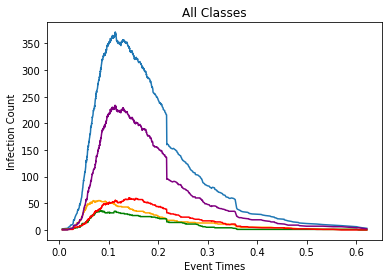

In [ ]:
for i in range(0, len(t), 5):
  display.clear_output(wait=True)

  plt.plot(t[0:i], inf_tot[0:i])
  plt.plot(t[0:i], C1[0:i], color='orange')
  plt.plot(t[0:i], C2[0:i], color='green')
  plt.plot(t[0:i], C3[0:i], color='red')
  plt.plot(t[0:i], C4[0:i], color='purple')

  plt.title('All Classes')
  plt.xlabel('Event Times')
  plt.ylabel('Infection Count')

  plt.show()
  time.sleep(0)

Pie chart of total infections:

(Values represent the percentage of total infections each class is responsible for)

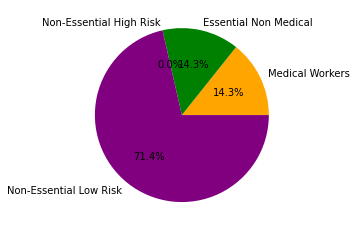

In [ ]:
for i in range(0, len(t)-5, 5):
  display.clear_output(wait=True)

  labels = 'Medical Workers','Essential Non Medical', 'Non-Essential High Risk','Non-Essential Low Risk'
  sizes = [C1[i], C2[i], C3[i], C4[i]]
  colors = ['orange', 'green', 'red', 'purple']

  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

  plt.show()
  time.sleep(0)

Basic plots:

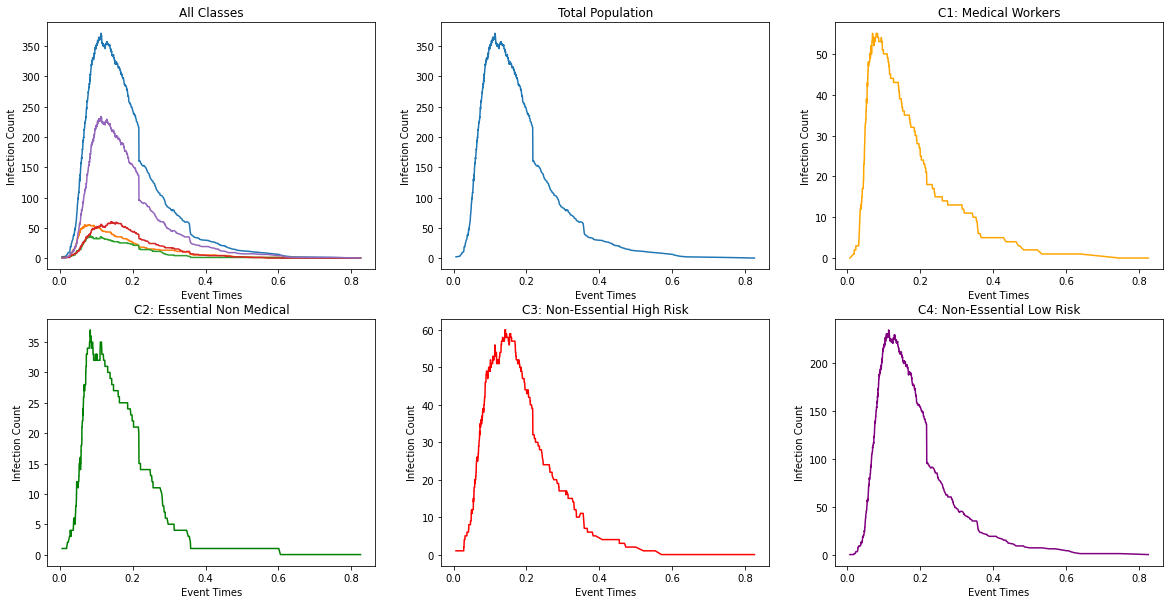

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
plt.figure()

#Overlay plot
ax[0][0].plot(t, inf_tot)
ax[0][0].plot(t, C1)
ax[0][0].plot(t, C2)
ax[0][0].plot(t, C3)
ax[0][0].plot(t, C4)
ax[0][0].set_title('All Classes')
ax[0][0].set_xlabel('Event Times')
ax[0][0].set_ylabel('Infection Count')

#Total
ax[0][1].plot(t, inf_tot)
ax[0][1].set_title('Total Population')
ax[0][1].set_xlabel('Event Times')
ax[0][1].set_ylabel('Infection Count')

#C1
ax[0][2].plot(t, C1, color='orange')
ax[0][2].set_title('C1: Medical Workers')
ax[0][2].set_xlabel('Event Times')
ax[0][2].set_ylabel('Infection Count')

#C2
ax[1][0].plot(t, C2, color='green')
ax[1][0].set_title('C2: Essential Non Medical')
ax[1][0].set_xlabel('Event Times')
ax[1][0].set_ylabel('Infection Count')

#C3
ax[1][1].plot(t, C3, color='red')
ax[1][1].set_title('C3: Non-Essential High Risk')
ax[1][1].set_xlabel('Event Times')
ax[1][1].set_ylabel('Infection Count')

#C4
ax[1][2].plot(t, C4, color='purple')
ax[1][2].set_title('C4: Non-Essential Low Risk')
ax[1][2].set_xlabel('Event Times')
ax[1][2].set_ylabel('Infection Count')

plt.show()